In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
csvfile = "Project_data_Children_under_5.csv"

In [4]:
dataframe = pd.read_csv(csvfile)

dataframe.head()

,state,Survey,Area,Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males),Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%),Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%),Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [5]:
dataframe.columns


Index(['state', 'Survey', 'Area',
       'Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)',
       'Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)',
       'Child Feeding Practices And Nutritional Status 

In [6]:
dataframe2 = dataframe.rename(columns={"Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)":"Gender_Aged_5years(Females per 1000 Males)",
                          "Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)":"Children_Registered",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)":"Children_Stunted_5years(Height-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)":"Children_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)":"Children_Severely_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)":"Children_Underweight_5years(Weight-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)":"Children_Breastfed_Within_One_Hour_Of_Birth_3years",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%)":"Children_Under_Age_6_Months_Exclusively_Breastfed",
                          "Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate_Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%)":"Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk",
                          "Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%":"Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"})
dataframe2.head()

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [7]:
dataframe2.head()
#cite
#https://www.geeksforgeeks.org/python-pandas-dataframe-rename/

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [8]:
df_nona = dataframe2.fillna(0)

In [9]:
Survey_NFHS3 = df_nona.loc[df_nona["Survey"] == "NFHS-3"]

In [10]:
Survey_NFHS4 = df_nona.loc[df_nona["Survey"] == "NFHS-4"]


In [110]:
Survey_NFHS4_rural = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Rural"]
Survey_NFHS4_urban = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Urban"]
Survey_NFHS4_total = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Total"]


Survey_NFHS4

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6
5,Andhra Pradesh,NFHS-4,Rural,880.0,79.9,32.5,17.8,4.4,33.1,38.8,71.1,6.3,11.0,50.6,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Lakshadweep,NFHS-4,Rural,0.0,100.0,25.5,22.5,0.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0
142,Lakshadweep,NFHS-4,Urban,932.0,98.9,27.1,13.2,3.5,22.6,55.8,57.8,12.1,0.0,0.0,11.2
144,Puducherry,NFHS-4,Total,843.0,99.0,23.7,23.6,7.8,22.0,65.3,45.5,21.8,54.8,76.8,31.1
145,Puducherry,NFHS-4,Rural,992.0,98.7,21.1,17.4,6.4,18.7,53.2,0.0,30.9,0.0,0.0,37.7


In [12]:
len(Survey_NFHS4_rural)

37

In [13]:
len(Survey_NFHS4_urban)

37

In [14]:
len(Survey_NFHS4_total)

37

In [15]:
len(Survey_NFHS3)

37

In [72]:
#Combining the under fed data into one DataFrame -(Stunted, Wasted, Severly Wasted and Underweight) For NFHS3

Survey_NFHS3_Under_Fed_Children = Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"]+ Survey_NFHS3["Children_Wasted(Weight-For-Height)"] + Survey_NFHS3["Children_Severely_Wasted(Weight-For-Height)"] + Survey_NFHS3["Children_Underweight_5years(Weight-For-Age)"]

Survey_NFHS3_Under_Fed_Children_Avg = Survey_NFHS3_Under_Fed_Children.mean()

Survey_NFHS3_Under_Fed_Children_Median = Survey_NFHS3_Under_Fed_Children.median()

Survey_NFHS3_Under_Fed_Children_Variance = Survey_NFHS3_Under_Fed_Children.var()

Survey_NFHS3_Under_Fed_Children_StdDeviation = Survey_NFHS3_Under_Fed_Children.std()


In [73]:
#Combining the Well fed(adequate diet) data into one DataFrame -(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS3
Survey_NFHS3_Well_Fed_Children = Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"]+ Survey_NFHS3["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS3["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS3["Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk"] + Survey_NFHS3["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]

Survey_NFHS3_Well_Fed_Children_Avg = Survey_NFHS3_Well_Fed_Children.mean()

Survey_NFHS3_Well_Fed_Children_Median = Survey_NFHS3_Well_Fed_Children.median()


In [108]:
#NFHS3 Under fed and wellfed average data
NFHS3_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[Survey_NFHS3_Under_Fed_Children_Avg],
                                      "Under Fed Children Median": [Survey_NFHS3_Under_Fed_Children_Median],
                                      "Well Fed Children Average":[Survey_NFHS3_Well_Fed_Children_Avg],
                                      "Well Fed Children Median":[Survey_NFHS3_Well_Fed_Children_Median]
                                      })
NFHS3_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Children Median,Well Fed Children Average,Well Fed Children Median
0,81.543243,97.2,79.916216,93.2


In [75]:
#Ratio calculated of Underfed to Wellfed children for NFHS3
NFHS3_UnderFed_To_WellFed_Ratio = NFHS3_Nutritional_Data["Well Fed Children Average"]/NFHS3_Nutritional_Data["Under Fed Children Average"]

print(NFHS3_UnderFed_To_WellFed_Ratio)

0    0.980047
dtype: float64


In [76]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Rural Areas
Survey_NFHS4_Rural_Under_Fed_Children = Survey_NFHS4_rural["Children_Stunted_5years(Height-For-Age)"]+ Survey_NFHS4_rural["Children_Wasted(Weight-For-Height)"] + Survey_NFHS4_rural["Children_Severely_Wasted(Weight-For-Height)"] + Survey_NFHS4_rural["Children_Underweight_5years(Weight-For-Age)"]

Survey_NFHS4_Rural_Under_Fed_Children_Avg = Survey_NFHS4_Rural_Under_Fed_Children.mean()

Survey_NFHS4_Rural_Under_Fed_Children_Median = Survey_NFHS4_Rural_Under_Fed_Children.median()

In [77]:
#Combining the Well fed(adequate diet) data into one DataFrame -
#(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS4 Rural Area
Survey_NFHS4_Rural_Well_Fed_Children = Survey_NFHS4_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"]+ Survey_NFHS4_rural["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_rural["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_rural["Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk"] + Survey_NFHS4_rural["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]

Survey_NFHS4_Rural_Well_Fed_Children_Avg = Survey_NFHS4_Rural_Well_Fed_Children.mean()

Survey_NFHS4_Rural_Well_Fed_Children_Median = Survey_NFHS4_Rural_Well_Fed_Children.median()

In [109]:
#NFHS4 Rural under fed and wellfed average data
NFHS4_Rural_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[Survey_NFHS4_Rural_Under_Fed_Children_Avg],
                                      "Under Fed Median": [Survey_NFHS4_Rural_Under_Fed_Children_Median],
                                      "Well Fed Children Average":[Survey_NFHS4_Rural_Well_Fed_Children_Avg],
                                      "Well Fed Children Median":[Survey_NFHS4_Rural_Well_Fed_Children_Median]})
NFHS4_Rural_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Median,Well Fed Children Average,Well Fed Children Median
0,86.859459,87.8,118.594595,125.6


In [79]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Rural Areas
NFHS4_Rural_UnderFed_To_WellFed_Ratio = NFHS4_Rural_Nutritional_Data["Well Fed Children Average"]/NFHS4_Rural_Nutritional_Data["Under Fed Children Average"]

print(NFHS4_Rural_UnderFed_To_WellFed_Ratio)

0    1.365362
dtype: float64


In [80]:
##Combining the under fed data into one DataFrame -
#(Stunted, Wasted, Severly Wasted and Underweight) For NFHS4 Urban Areas
Survey_NFHS4_Urban_Under_Fed_Children = Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"]+ Survey_NFHS4_urban["Children_Wasted(Weight-For-Height)"] + Survey_NFHS4_urban["Children_Severely_Wasted(Weight-For-Height)"] + Survey_NFHS4_urban["Children_Underweight_5years(Weight-For-Age)"]

Survey_NFHS4_Urban_Under_Fed_Children_Avg = Survey_NFHS4_Urban_Under_Fed_Children.mean()

Survey_NFHS4_Urban_Under_Fed_Children_Median = Survey_NFHS4_Urban_Under_Fed_Children.median()



In [81]:
#Combining the Well fed(adequate diet) data into one DataFrame -
#(Exclusively breastfed, non breastfed, solid food and breastmilk) For NFHS4 Urban Areas
Survey_NFHS4_Urban_Well_Fed_Children = Survey_NFHS4_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"]+ Survey_NFHS4_urban["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_urban["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_urban["Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk"] + Survey_NFHS4_urban["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]

Survey_NFHS4_Urban_Well_Fed_Children_Avg = Survey_NFHS4_Urban_Well_Fed_Children.mean()

Survey_NFHS4_Urban_Well_Fed_Children_Median = Survey_NFHS4_Urban_Well_Fed_Children.median()
  



In [82]:
#NFHS4 Urban under fed and wellfed average data
NFHS4_Urban_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[Survey_NFHS4_Urban_Under_Fed_Children_Avg],
                                      "Under Fed Median": [Survey_NFHS4_Urban_Under_Fed_Children_Median],
                                      "Well Fed Children Average":[Survey_NFHS4_Urban_Well_Fed_Children_Avg],
                                      "Well Fed Children Median":[Survey_NFHS4_Urban_Well_Fed_Children_Median]})
NFHS4_Urban_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Median,Well Fed Children Average,Well Fed Children Median
0,74.702703,77.4,126.032432,133.4


In [83]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Urban Areas
NFHS4_Urban_UnderFed_To_WellFed_Ratio = NFHS4_Urban_Nutritional_Data["Well Fed Children Average"]/NFHS4_Urban_Nutritional_Data["Under Fed Children Average"]

print(NFHS4_Urban_UnderFed_To_WellFed_Ratio)

0    1.68712
dtype: float64


In [84]:
#Ratio calculated of Underfed to Wellfed children for NFHS4 Urban Areas to Rural Areas
NFHS4_Urban_To_Rural_Nutrition_Ratio = NFHS4_Urban_UnderFed_To_WellFed_Ratio/NFHS4_Rural_UnderFed_To_WellFed_Ratio
print(NFHS4_Urban_To_Rural_Nutrition_Ratio)

0    1.235658
dtype: float64


In [85]:
#NFHS4 Total Under Fed Data
Survey_NFHS4_Total_Under_Fed_Children = Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"]+ Survey_NFHS4_total["Children_Wasted(Weight-For-Height)"] + Survey_NFHS4_total["Children_Severely_Wasted(Weight-For-Height)"] + Survey_NFHS4_total["Children_Underweight_5years(Weight-For-Age)"]

Survey_NFHS4_Total_Under_Fed_Children_Avg = Survey_NFHS4_Total_Under_Fed_Children.mean()

Survey_NFHS4_Total_Under_Fed_Children_Median = Survey_NFHS4_Total_Under_Fed_Children.median()

In [87]:
#NFHS4 Total Well Fed Data
Survey_NFHS4_Total_Well_Fed_Children = Survey_NFHS4_total["Children_Under_Age_6_Months_Exclusively_Breastfed"]+ Survey_NFHS4_total["Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_total["Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]+ Survey_NFHS4_total["Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk"] + Survey_NFHS4_total["Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"]

Survey_NFHS4_Total_Well_Fed_Children_Avg = Survey_NFHS4_Total_Well_Fed_Children.mean()

Survey_NFHS4_Total_Well_Fed_Children_Median = Survey_NFHS4_Total_Well_Fed_Children.median()

In [88]:
#NFHS Total Data
NFHS4_Total_Nutritional_Data = pd.DataFrame({"Under Fed Children Average":[Survey_NFHS4_Total_Under_Fed_Children_Avg],
                                      "Under Fed Median": [Survey_NFHS4_Total_Under_Fed_Children_Median],
                                      "Well Fed Children Average":[Survey_NFHS4_Total_Well_Fed_Children_Avg],
                                      "Well Fed Children Median":[Survey_NFHS4_Total_Well_Fed_Children_Median]})
NFHS4_Total_Nutritional_Data.head()

,Under Fed Children Average,Under Fed Median,Well Fed Children Average,Well Fed Children Median
0,86.272973,85.0,135.586486,133.5


In [89]:
#NFHS4 Total Under Fed to Well Fed ratio
NFHS4_UnderFed_To_WellFed_Ratio = NFHS4_Total_Nutritional_Data["Well Fed Children Average"]/NFHS4_Total_Nutritional_Data["Under Fed Children Average"]
print(NFHS4_UnderFed_To_WellFed_Ratio)

0    1.571599
dtype: float64


In [90]:
#NFHS3 to NFHS4 Ratio
NFHS3_To_NFHS4_Nutritional_Ratio = (NFHS4_UnderFed_To_WellFed_Ratio/NFHS3_UnderFed_To_WellFed_Ratio)
print(NFHS3_To_NFHS4_Nutritional_Ratio)

0    1.603595
dtype: float64


In [91]:
#NFHS3 to NFHS4 Increase & Percent Change calculated. 
NFHS3_To_NFHS4_Increase = (NFHS4_UnderFed_To_WellFed_Ratio - NFHS3_UnderFed_To_WellFed_Ratio)
NFHS3_To_NFHS4_Percent_Change = (NFHS3_To_NFHS4_Increase/NFHS3_UnderFed_To_WellFed_Ratio)*100
NFHS3_To_NFHS4_Percent_Change

0    60.359506
dtype: float64

In [92]:
#NFHS3 &NFHS4 Percent Change put in a new DataFrame.

NFHS3_To_NFHS4_Nutritional_Change = pd.DataFrame({"Ratio":NFHS3_To_NFHS4_Nutritional_Ratio,
                                                 "Percent Change":NFHS3_To_NFHS4_Percent_Change})
NFHS3_To_NFHS4_Nutritional_Change["Percent Change"]=NFHS3_To_NFHS4_Nutritional_Change["Percent Change"].map("{:,.2f}%".format)
NFHS3_To_NFHS4_Nutritional_Change.head()

,Ratio,Percent Change
0,1.603595,60.36%


In [93]:
#NFHS3 Female Child per 1000 males per state
NFHS3_Female_Child = Survey_NFHS3[["state","Gender_Aged_5years(Females per 1000 Males)"]].reset_index()

NFHS3_Female_Child = NFHS3_Female_Child.drop(columns=["index"])
NFHS3_Female_Child

,state,Gender_Aged_5years(Females per 1000 Males)
0,India,914.0
1,Andhra Pradesh,0.0
2,Assam,1033.0
3,Bihar,893.0
4,Chattisgarh,972.0
5,Gujarat,906.0
6,Haryana,762.0
7,Jharkhand,1091.0
8,Karnataka,922.0
9,Kerala,925.0


In [94]:
#NFHS4 Female Child per 1000 males per state
NFHS4_Female_Child = Survey_NFHS4_total[["state","Gender_Aged_5years(Females per 1000 Males)"]].reset_index()

NFHS4_Female_Child = NFHS4_Female_Child.drop(columns=["index"])
NFHS4_Female_Child

,state,Gender_Aged_5years(Females per 1000 Males)
0,India,919.0
1,Andhra Pradesh,914.0
2,Assam,929.0
3,Bihar,934.0
4,Chattisgarh,977.0
5,Gujarat,907.0
6,Haryana,836.0
7,Jharkhand,919.0
8,Karnataka,910.0
9,Kerala,1047.0


In [96]:
#Both DataFrames merged into one
#Derived the percent change of Female CHild per 1000 male over the period of both surveys.

#Note: since some states had 0 during NFHS3 survey, those percentage changes show in negative. 

Female_Gender_NFHS3_NFHS4 = pd.merge(NFHS3_Female_Child,NFHS4_Female_Child, on="state")
Female_Gender_NFHS3_NFHS4 = Female_Gender_NFHS3_NFHS4.rename(columns={"Gender_Aged_5years(Females per 1000 Males)_y":"Gender_Aged_5years(Females per 1000 Males)NFHS4",
                                                                     "Gender_Aged_5years(Females per 1000 Males)_x":"Gender_Aged_5years(Females per 1000 Males)NFHS3"})
Female_Gender_NFHS3_NFHS4["Percent"] =""

gender_change = (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS4"])- (Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"])

gender_change_increase = ((gender_change)/(Female_Gender_NFHS3_NFHS4["Gender_Aged_5years(Females per 1000 Males)NFHS3"]))*100

gender_change_increase

Female_Gender_NFHS3_NFHS4["Percent"] = gender_change_increase

Female_Gender_NFHS3_NFHS4["Percent"] = Female_Gender_NFHS3_NFHS4["Percent"].map("{:,.2f}%".format)

Female_Gender_NFHS3_NFHS4.head(50)




,state,Gender_Aged_5years(Females per 1000 Males)NFHS3,Gender_Aged_5years(Females per 1000 Males)NFHS4,Percent
0,India,914.0,919.0,0.55%
1,Andhra Pradesh,0.0,914.0,inf%
2,Assam,1033.0,929.0,-10.07%
3,Bihar,893.0,934.0,4.59%
4,Chattisgarh,972.0,977.0,0.51%
5,Gujarat,906.0,907.0,0.11%
6,Haryana,762.0,836.0,9.71%
7,Jharkhand,1091.0,919.0,-15.77%
8,Karnataka,922.0,910.0,-1.30%
9,Kerala,925.0,1047.0,13.19%


In [97]:
#ADDING NEWLY CREATED COLUMNS TO the main dataframe 

 

Survey_NFHS3.loc[:,'underfed'] = Survey_NFHS3_Under_Fed_Children
Survey_NFHS3.loc[:,'adequatefed'] = Survey_NFHS3_Well_Fed_Children


Survey_NFHS4_rural.loc[:,'underfed']  = Survey_NFHS4_Rural_Under_Fed_Children 
Survey_NFHS4_rural.loc[:,'adequatefed'] = Survey_NFHS4_Rural_Well_Fed_Children

Survey_NFHS4_urban.loc[:,'underfed'] = Survey_NFHS4_Urban_Under_Fed_Children
Survey_NFHS4_urban.loc[:,'adequatefed'] =Survey_NFHS4_Urban_Well_Fed_Children

Survey_NFHS4_total.loc[:,'underfed'] = Survey_NFHS4_Total_Under_Fed_Children
Survey_NFHS4_total.loc[:,'adequatefed'] = Survey_NFHS4_Total_Well_Fed_Children




C:\Users\kames\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kames\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [102]:
#display required columns only
Survey_NFHS3[['state','Gender_Aged_5years(Females per 1000 Males)','underfed','adequatefed']]





,state,Gender_Aged_5years(Females per 1000 Males),underfed,adequatefed
3,India,914.0,116.7,99.0
7,Andhra Pradesh,0.0,0.0,0.0
11,Assam,1033.0,100.6,123.2
15,Bihar,893.0,146.9,82.5
19,Chattisgarh,972.0,125.1,131.0
23,Gujarat,906.0,120.8,101.9
27,Haryana,762.0,109.4,59.5
31,Jharkhand,1091.0,150.4,118.0
35,Karnataka,922.0,104.8,128.3
39,Kerala,925.0,67.4,150.1


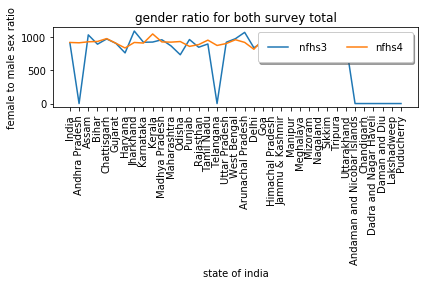

37

In [106]:
#plot a LINE graph of gender ratio of total nfhs3 and 4




# Set x axis and tick locations
x_axis = np.arange(len(Survey_NFHS3['state']))
tick_locations = [value for value in x_axis]


gender_chart = Female_Gender_NFHS3_NFHS4.plot(x='state',y=['Gender_Aged_5years(Females per 1000 Males)NFHS3','Gender_Aged_5years(Females per 1000 Males)NFHS4'],kind="line", title="gender ratio for both survey total")
gender_chart.set_xlabel("state of india")
gender_chart.set_ylabel("female to male sex ratio")

plt.xticks(tick_locations, Survey_NFHS3['state'], rotation="vertical")
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/genderratioplotofsurveystotal.png")
Gender = [ ' nfhs3','nfhs4']
plt.legend(Gender, loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
plt.tight_layout()

plt.show()


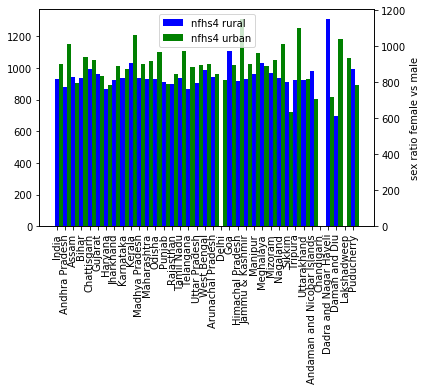

In [46]:
#plot gender of  nfhs 4 rural vs urban for each state

x = np.arange(len(Survey_NFHS4_rural['state']))
tick_locations = [value for value in x]
                  
        
ax1 = plt.subplot(1,1,1)
w = 0.5
#plt.xticks(), will label the bars on x axis with the respective state names.
plt.xticks(tick_locations, Survey_NFHS4_rural['state'], rotation="vertical")
pop =ax1.bar(x,Survey_NFHS4_rural['Gender_Aged_5years(Females per 1000 Males)'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

gdp =ax2.bar(x + w, Survey_NFHS4_urban['Gender_Aged_5years(Females per 1000 Males)'], width=w,color='g',align='center')
#Set the Y axis label 


plt.ylabel('sex ratio female vs male')
plt.xlabel('States of india')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],[ 'nfhs4 rural','nfhs4 urban'])

plt.show()

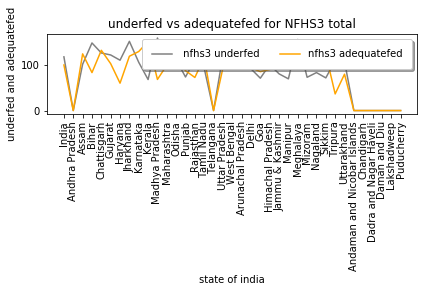

In [70]:
#Ratio of underfed to wellfed for hfhs 3 totals for each state





# Set x axis and tick locations
x_axis = np.arange(len(Survey_NFHS3['state']))
tick_locations = [value for value in x_axis]


nfhs3plot= Survey_NFHS3.plot(x='state',y=['underfed','adequatefed'],kind="line", color = ['grey','orange'],title="underfed vs adequatefed for NFHS3 total")
nfhs3plot.set_xlabel("state of india")
nfhs3plot.set_ylabel("underfed and adequatefed")

plt.xticks(tick_locations, Survey_NFHS3['state'], rotation="vertical")
#plt.figure(figsize=(50,50))
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/genderratioplotofsurveystotal.png")
Gender = [ ' nfhs3 underfed','nfhs3 adequatefed']
plt.legend(Gender, loc="upper right",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
plt.tight_layout()

plt.show()



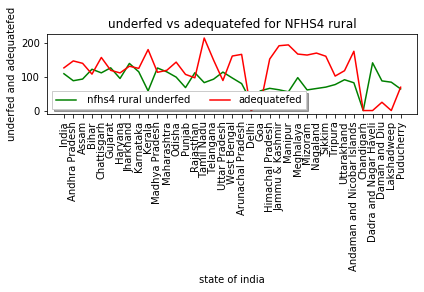

In [68]:
#Ratio of underfed to wellfed for hfhs 4 rurals for each state
# Set x axis and tick locations
x_axis = np.arange(len(Survey_NFHS4_rural['state']))
tick_locations = [value for value in x_axis]


nfhs4ruralplot= Survey_NFHS4_rural.plot(x='state',y=['underfed','adequatefed'],kind="line", color = ['green','red'],title="underfed vs adequatefed for NFHS4 rural")
nfhs4ruralplot.set_xlabel("state of india")
nfhs4ruralplot.set_ylabel("underfed and adequatefed")

plt.xticks(tick_locations, Survey_NFHS4_rural['state'], rotation="vertical")
#plt.figure(figsize=(700,700))
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/genderratioplotofsurveystotal.png")
Gender = [ ' nfhs4 rural underfed','adequatefed']
plt.legend(Gender, loc="best",fancybox= False,shadow=True,ncol=2)
plt.tight_layout()

plt.show()



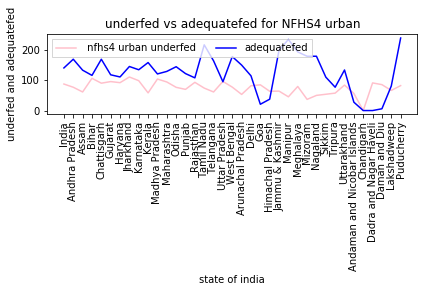

In [67]:
#Ratio of underfed to wellfed for hfhs 4 urban for each state
# Set x axis and tick locations
x_axis = np.arange(len(Survey_NFHS4_urban['state']))
tick_locations = [value for value in x_axis]


nfhs4urbanplot= Survey_NFHS4_urban.plot(x='state',y=['underfed','adequatefed'],kind="line", color =['pink','blue'],title="underfed vs adequatefed for NFHS4 urban")
nfhs4urbanplot.set_xlabel("state of india")
nfhs4urbanplot.set_ylabel("underfed and adequatefed")

plt.xticks(tick_locations, Survey_NFHS4_urban['state'], rotation="vertical")
#plt.figure(figsize=(700,700))
#fig.set_size_inches(1000, 290, forward=True)
#plt.savefig("/Images/fig3.png")
Gender = [ ' nfhs4 urban underfed','adequatefed']
plt.legend(Gender, loc="best",fancybox=False,ncol=2)
plt.tight_layout()

plt.show()



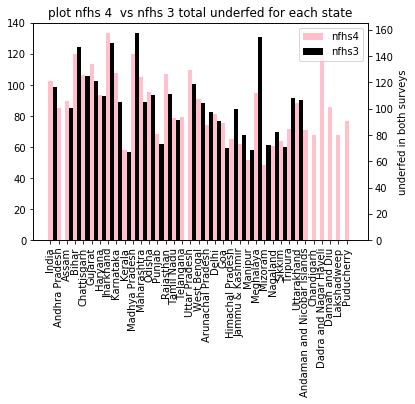

In [81]:
#plot nfhs 4  vs nfhs 3 total underfed for each state

x = np.arange(len(Survey_NFHS4_total['state']))
tick_locations = [value for value in x]
                  
        
ax1 = plt.subplot(1,1,1)
w = 0.5
#plt.xticks(), will label the bars on x axis with the respective state names.
plt.xticks(tick_locations, Survey_NFHS4_total['state'], rotation="vertical")
pop =ax1.bar(x,Survey_NFHS4_total['underfed'], width=w, color='pink', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

gdp =ax2.bar(x + w, Survey_NFHS3['underfed'], width=w,color='black',align='center')

#Set the axis label 
plt.ylabel('underfed in both surveys')
plt.xlabel('States of india')
#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],[ 'nfhs4','nfhs3'])
plt.title('plot nfhs 4  vs nfhs 3 total underfed for each state')
plt.show()

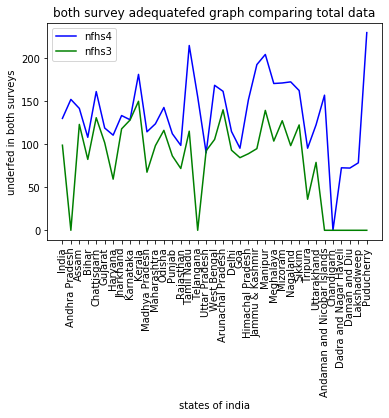

In [80]:

#total of both survey adequatefed graph



x_axis = np.arange(len(Survey_NFHS4_total['state']))
tick_locations = [value for value in x_axis]
#boxplot = Survey_NFHS4_total.boxplot(column=[Survey_NFHS4_total['underfed'], Survey_NFHS3['underfed']], by='state',layout=(2, 1))

# Plot the nfhs4 adequatefed as a line chart
world_avg, = plt.plot(Survey_NFHS4_total['state'], Survey_NFHS4_total['adequatefed'], color="blue", label="nfhs4" )

# Plot thenfhs3 adeqautefed  for a single country
country_one, = plt.plot(Survey_NFHS4_total['state'], Survey_NFHS3['adequatefed'],color="green",label= "nfhs3")


plt.xticks(tick_locations, Survey_NFHS4_total['state'], rotation="vertical")
# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")
plt.xlabel('states of india')
plt.ylabel('underfed in both surveys')
plt.title('both survey adequatefed graph comparing total data')
# Show the chart
plt.show()

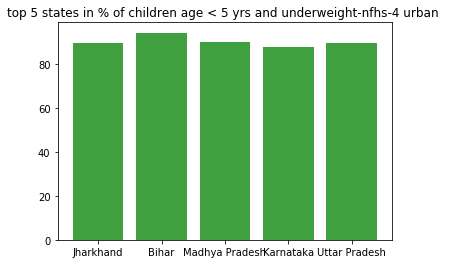

In [124]:
#top 5 states in % of children age < 5 yrs and underweight-nfhs-4

top51 = Survey_NFHS4_urban.nlargest(5, ['underfed'], keep='first')
top52 = Survey_NFHS4_rural.nlargest(5, ['underfed'], keep='first')



#NFHS4urban_top5_Data = pd.DataFrame({"state":top5['state'],
                                      #"Under Fed Children":top5['underfed']})


x_axis1 = np.arange(len(top51['state']))
tick_locations = []
for x in x_axis1:
    tick_locations.append(x)

    
    
plt.bar(x_axis1,(top51['Gender_Aged_5years(Females per 1000 Males)']/10) ,facecolor="green", alpha=0.75, align="center")

plt.xticks(tick_locations, top5['state'])
plt.title('top 5 states in % of children age < 5 yrs and underweight-nfhs-4 urban ')
plt.show()


#children pecentage is (top51['Gender_Aged_5years(Females per 1000 Males)']/10)


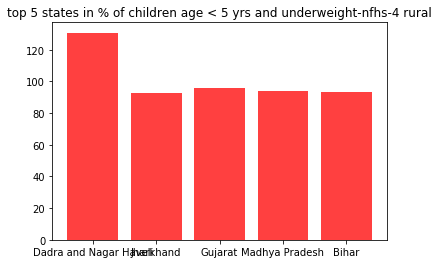

In [121]:
x_axis2 = np.arange(len(top52['state']))
tick_locations = []
for x in x_axis2:
    tick_locations.append(x)

    
    
plt.bar(x_axis2,(top52['Gender_Aged_5years(Females per 1000 Males)']/10) , facecolor="red", alpha=0.75, align="center")

plt.xticks(tick_locations, top52['state'])
plt.title('top 5 states in % of children age < 5 yrs and underweight-nfhs-4 rural')
plt.show()


In [125]:
bottom51 = Survey_NFHS4_rural.nsmallest(5, ['underfed'], keep='first')

bottom51

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet,underfed,adequatefed
129,Chandigarh,NFHS-4,Rural,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,Delhi,NFHS-4,Rural,0.0,89.5,25.1,0.6,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
97,Manipur,NFHS-4,Rural,962.0,59.7,31.4,7.1,2.4,14.2,66.1,71.3,18.4,7.5,78.8,17.3,55.1,193.3
37,Kerala,NFHS-4,Rural,1032.0,98.1,19.5,15.5,6.1,16.7,64.8,51.3,22.7,20.6,62.4,22.5,57.8,179.5
85,Goa,NFHS-4,Rural,1109.0,99.0,23.2,11.5,2.1,21.2,74.7,0.0,8.6,0.0,0.0,8.2,58.0,16.8
